In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#from abtem.reconstruct import invms
from abtem.measure import Measurement, Calibration
from abtem.utils import energy2wavelength 
from abtem.waves import Probe 
import scipy.io as io
import h5py

from abtem.custom import decimate_measurement, crop


#matplotlib.rcParams["figure.figsize"] = (20, 10)
#matplotlib.rcParams['lines.linewidth'] = 2
#font = {'weight' : 'bold',
#                'size'   : 22}
#matplotlib.rc('font', **font)

In [2]:
#%matplotlib inline

In [3]:
#%matplotlib widget

In [4]:
import pathlib, datetime
from hyperspy_swift_library import SwiftLibraryReader
proj_path = pathlib.Path("/home/jilek/vienna_data/240730_nanotubes_graphene/240730 - nanotubes on graphene.nsproj")
project = SwiftLibraryReader(proj_path)
#data = h5py.File("/home/jilek/vienna_data/240730_nanotubes_graphene/")

In [5]:
df = project.get_data_items_properties()

In [6]:
#%matplotlib inline

In [7]:
import pathlib

In [8]:
df['metadata'][21]

{'instrument': {'high_tension': 60000.0,
  'defocus': 1.8087586967106616e-09,
  'ImageScanned': {'C1 ConstW': 0.5635460000000031,
   'EHT': 60000.0,
   'PMTBF_gain': 6400.0,
   'PMTDF_gain': 40000.0,
   'S_EELS': 1.0,
   'StageOutA': 0.0,
   'StageOutB': -1.0380128613945578e-08,
   'StageOutX': -3.3811520736469806e-05,
   'StageOutY': 1.862921631525176e-05,
   'StageOutZ': 0.00024574824188501777,
   'BP2_^VGVOACurrent': 6.031116e-10,
   'VacuumController.^OG': 4.8e-10,
   'probe_ha': 0.035,
   'C10': 1.8087586967106616e-09,
   'C12.a': -1.7421357763869154e-10,
   'C12.b': -3.4891624928580034e-09,
   'C21.a': -3.062704949415112e-07,
   'C21.b': -2.012054472443914e-08,
   'C23.a': 2.5011414200553306e-08,
   'C23.b': 8.086820616467402e-08,
   'C30': -1.4420938208010289e-05,
   'C32.a': -1.0994144906606555e-06,
   'C32.b': 1.0110653311187698e-05,
   'C34.a': 1.8687237808523126e-07,
   'C34.b': 3.843822087383854e-06,
   'C41.a': 0.0004842283536980463,
   'C41.b': 3.1811547009396686e-05,
   

0
[1024, 1024]
1
[512, 512]
2
[512, 512]
3
[512, 512]
4
[256, 256]
5
[256, 256]
6
[1024, 1024]
7
[1024, 1024]
8
[1024, 1024]
9
[1024, 1024]
10
[2048, 2048]
11
[2048, 2048]
12
[2048, 2048]
13
[2048, 2048]
14
[2048, 2048]
15
[2048, 2048]
16
[2048, 2048]
17
[2048, 2048]
18
[192, 192]
19
[64, 64]
20
[64, 64, 192, 192]
defocus:  18.087586967106613
j:  20
Acquire Synchronized Ronchigram
[64, 64, 192, 192]
FoV:  40.0
21
[64, 64]
22
[64, 64, 192, 192]
defocus:  18.087586967106613
j:  22
Acquire Synchronized Ronchigram
[64, 64, 192, 192]
FoV:  60.0
23
[64, 64]
24
[64, 64, 192, 192]
defocus:  68.0875869671066
j:  24
Acquire Synchronized Ronchigram
[64, 64, 192, 192]
FoV:  60.0
25
[64, 64]
26
[64, 64, 192, 192]
defocus:  118.0875869671066
j:  26
Acquire Synchronized Ronchigram
[64, 64, 192, 192]
FoV:  60.0
27
[2048, 2048]
28
[64, 64]
29
[64, 64, 192, 192]
defocus:  18.087586967106613
j:  29
Acquire Synchronized Ronchigram
[64, 64, 192, 192]
FoV:  60.0
30
[64, 64]
31
[64, 64, 192, 192]
defocus:  5

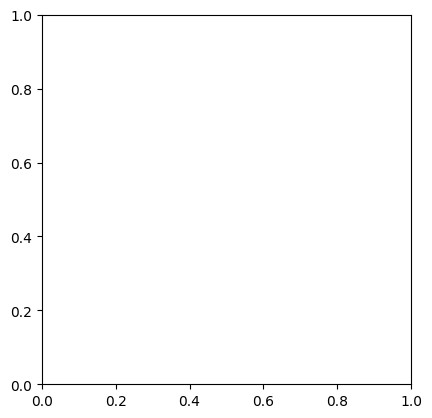

In [9]:
for j in range(len(df['metadata'])):
    print(j)
    print(df['data_shape'][j])
    try: 
        fov=df['metadata'][j]['scan']['fov_nm']*10 
        #len(df['data_shape'][j]) == 2
        hy_data_ = project.load_data(j)        
        path=pathlib.Path("./figs/haadf/")
        path.mkdir(exist_ok=True,parents=True)
        plt.imshow(hy_data_.data,extent=(0,fov,0,fov),cmap="gray")
        plt.xlabel("x [Å]");plt.ylabel("y [Å]")
        plt.savefig(path/"{:02}.pdf".format(j))
        plt.close()
    except: pass

    try:
        print("defocus: ", df['metadata'][j]['hardware_source']['defocus']/1e-10)
        print("j: ",j)
        print(df['title'][j])
        print(df['data_shape'][j])
        print("FoV: ",df['metadata'][j]['scan']['fov_nm']*10)
    except: pass

In [546]:
i=25 #21(infocus) 25(outoffocus) #28(infocus) 32(outoffocus) # 36 - je potreba si vybrat offset 20 a mensi FoV pro invms()

In [547]:
fig_folder = pathlib.Path("./figs/")/datetime.date.today().strftime("%y%m%d_")/"{:02}".format(i)
fig_folder.mkdir(exist_ok=True,parents=True)

[########################################] | 100% Completed | 104.96 ms


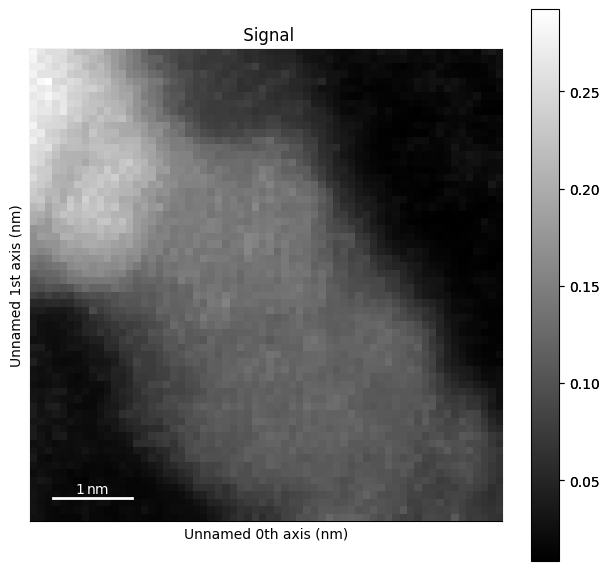

In [548]:
hy_data_ = project.load_data(i)
hy_data_.plot()

In [549]:
#%matplotlib qt

Acquire Synchronized Ronchigram
[64, 64, 192, 192]
<LazySignal2D, title: , dimensions: (64, 64|192, 192)>
DEFOCUS: 118.0875869671066
j: 26
[########################################] | 100% Completed | 203.80 ms


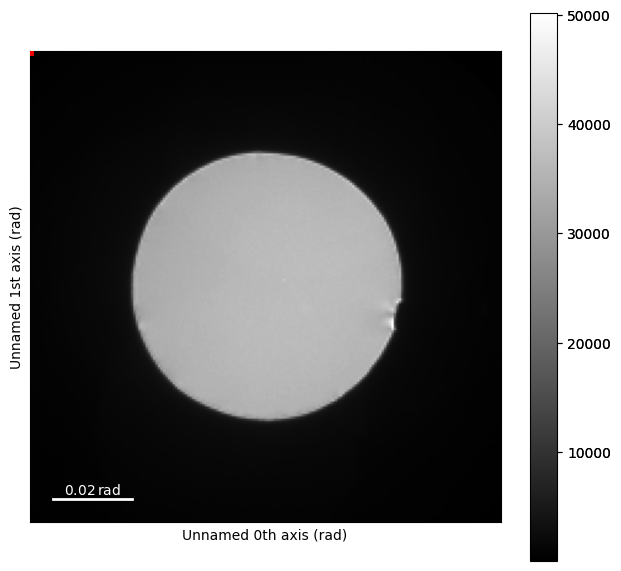

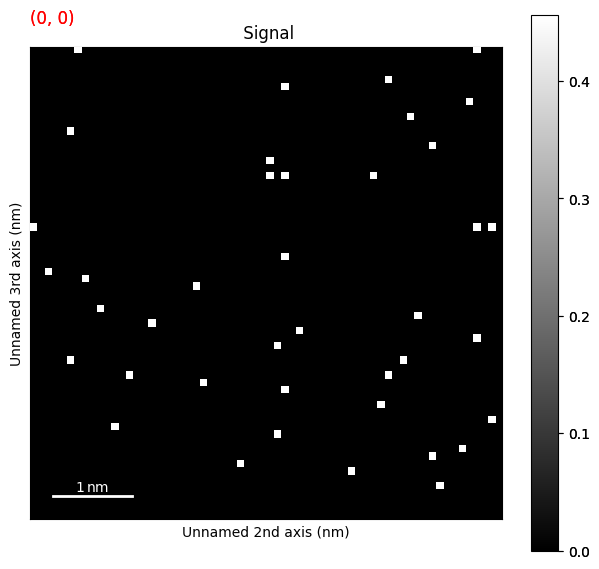

In [550]:
j=i+1
hy_data = project.load_data(j)
metadata = df['metadata'][j]
#foV
print(df["title"][j])
print(df["data_shape"][j])
print(hy_data)
try: 
    defocus_loaded = metadata['hardware_source']['defocus']/1e-10#.keys()
    print("DEFOCUS:",defocus_loaded)
    print("j:",j)
except: pass
    
hy_data.transpose(signal_axes=(0,1),).plot()

In [551]:
data = np.array(hy_data.data)
energy = metadata['instrument']['high_tension']
FoV = metadata['scan']['fov_nm']*10
scan_step_size = FoV/data.shape[0]
N_ex = 64#40
step = 1
N_dp = N_ex//step

x_offset = 0#20
y_offset = 0#20
dp = data[x_offset:x_offset+N_ex:step,y_offset:y_offset+N_ex:step,:,:].reshape((-1,*data.shape[-2:]))

#dp=data[-N_dp:,-N_dp:,:,:].reshape((-1,*data.shape[-2:])) # from shape 124,124,60,60 to shape 124,124,3600 
#dp=data[0:N_dp,0:N_dp,:,:].reshape((-1,*data.shape[-2:])) # from shape 124,124,60,60 to shape 124,124,3600 
#dp=data['cbed'][:,:,30:30+30,0:0+30].reshape((*data['cbed'].shape[:2],-1)) # from shape 124,124,60,60 to shape 124,124,3600 (selecting only region of 30x30 scan points out of 60x60)

#dp=dp.transpose((0,2,1)) #? from shape 124,124,3600 to shape 3600,124,124
#dp=dp[:,::-1,::-1]
#dp=dp[]

dp[dp<4]=0 # 11pA 2ms 
dp=dp/np.mean(np.sum(np.abs(dp),(1,2)))
#N_dp=30 # see np.sqrt(np.shape(data['cbed'])[-1])
x = np.linspace(0,-(N_dp-1)*scan_step_size*step,N_dp) 
y = np.linspace(0,-(N_dp-1)*scan_step_size*step,N_dp) 
grid = np.meshgrid(x,y)
positions_x = grid[0].T.reshape(-1)
positions_y = grid[1].T.reshape(-1)

rot_angle = 0*np.pi
positions_x_rot = positions_x*np.cos(rot_angle) + positions_y*np.sin(rot_angle)  + 5
positions_y_rot = positions_x*-np.sin(rot_angle) + positions_y*np.cos(rot_angle) + 20
positions = np.array([positions_x_rot,positions_y_rot]).T

In [552]:
np.sum(data[0,0])/8e-6

41879796875.0

In [553]:
np.mean(np.sum(data,axis=(2,3)))*1.9e-19/0.98e-3

7.474510331632654e-11

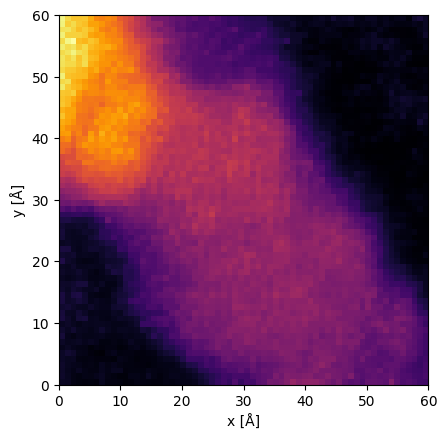

In [554]:
ex=scan_step_size*hy_data_.data.shape[0]
extent=(0,ex,0,ex)
plt.imshow(hy_data_.data,cmap="inferno",extent=extent)
plt.xlabel("x [Å]");plt.ylabel("y [Å]")
plt.savefig(fig_folder/"01_HAADF.pdf")

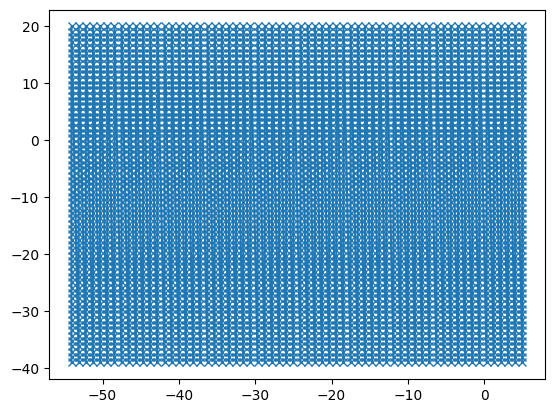

In [555]:
plt.figure()
plt.plot(positions_x_rot,positions_y_rot,"-x")
plt.show()

In [556]:
#scale_factor=1000*energy2wavelength(energy*1e3)#to convert spatial frequency to mrad
units = 'mrad'
names = [r'$\alpha_x$', r'$\alpha_y$']

dalpha=metadata['hardware_source']['ImageRonchigram']['ARINAPixelAngle']*1e3

cals=(None,)
for i,name in enumerate(names):
    cal=Calibration(offset=-dalpha*dp.shape[1+i]/2,sampling=dalpha, units = units, name=names[i])
    cals+=(cal,)
measurement_=Measurement(dp,calibrations=cals)

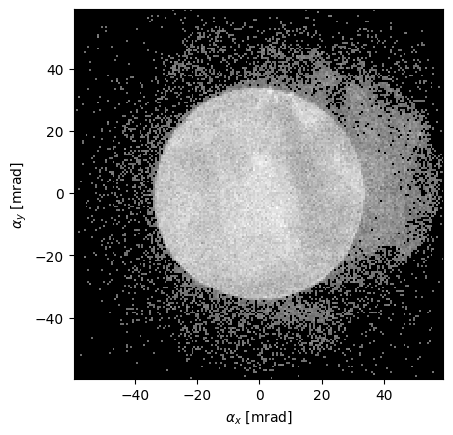

In [557]:
measurement_[0].show(power=0.3)
plt.savefig(fig_folder/"02_diffpat_sample.pdf")

In [558]:
measurement = decimate_measurement(measurement_,1)

In [559]:
angular_extent = measurement.calibrations[1].sampling*measurement.shape[1] # angular extent in x and y is the same

In [560]:
measurement.shape

(4096, 192, 192)

(<Axes: xlabel='$\\alpha_x$ [mrad]', ylabel='$\\alpha_y$ [mrad]'>,
 <matplotlib.image.AxesImage at 0x7f039572bb20>)

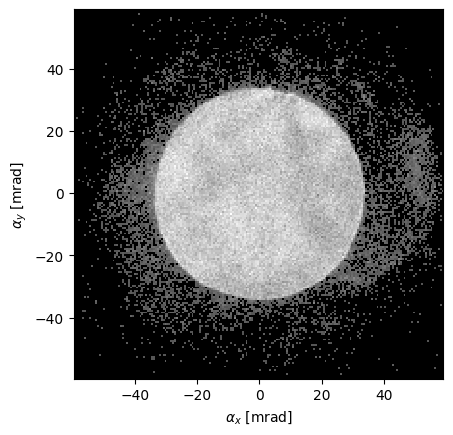

In [561]:
measurement[9].show(power=0.4)

In [562]:
%matplotlib inline

In [563]:
p=0
sel=np.random.choice((True,False),size=measurement.shape[0],p=(1-p,p))

In [564]:
measurement_reduced=measurement.copy()
measurement_reduced._array=measurement.array[sel]
positions_reduced = positions[sel]

In [565]:
#from abtem.reconstruct import invms
#semiangle_cutoff = 34
#defocus = defocus_loaded
#probe_guess = Probe(semiangle_cutoff=semiangle_cutoff, energy=energy,defocus=defocus,extent=40,gpts=256)
##reconstructions = invms(measurement, probe_guess, max_angle=angular_extent, positions = positions, modes=4,k_modes=1, alpha=1, fac=1, beta=1, slices=1, slice_thickness=21,  maxiter=32*2, return_iterations=True, fix_com=True,device='gpu')
## docela fajn: reconstructions = invms(measurement, probe_guess, max_angle=angular_extent, positions = positions, modes=3,k_modes=1, alpha=0.5, fac=1, beta=1, slices=4, slice_thickness=2.5,  maxiter=32, return_iterations=True, fix_com=True,device='gpu')
#slices=1
#modes=1
#reconstructions = invms(measurement_reduced, probe_guess, max_angle=angular_extent*2, positions = positions_reduced, modes=modes,k_modes=1, alpha=1, fac=1, beta=1, slices=slices, slice_thickness=20,  maxiter=4, return_iterations=True, fix_com=True,device='gpu')

In [566]:
#1/(30e-3*1/Probe(energy=30e3).wavelength)

In [567]:
#plot_every = 1
#
#fig, axes = plt.subplots(2, int(np.ceil(len(reconstructions[0]) / plot_every)), figsize=(20,20))
#
#for i, j in enumerate(range(0, len(reconstructions[0]), plot_every)):
#    axes[0,i].imshow(np.angle(reconstructions[0][j][-1].array).T, origin='lower', cmap='inferno')
#    axes[1,i].imshow(np.abs(reconstructions[1][j][0].array).T ** 2, origin='lower', cmap='gray')
#    for ax in (axes[0,i], axes[1,i]):
#        ax.axis('off')
#    
#plt.tight_layout()

In [568]:
#%matplotlib inline

In [569]:
#plt.figure()
#plt.imshow(np.abs(reconstructions[1][-1][0].array).T ** 2, origin='lower', cmap='gray')

In [570]:
#plt.figure(figsize=(10,10))
#rec_sum=np.zeros_like(np.angle(reconstructions[0][-1][0].array))
#for i in range(slices):
#    asdf=np.angle(reconstructions[0][-1][i].array)
#    rec_sum+=asdf
#    print(np.ptp(asdf))
#
#ex=1/(measurement.calibrations[-1].sampling*1e-3*1/Probe(energy=energy).wavelength)
#extent=(0,ex,0,ex)
#plt.imshow(np.fft.fftshift(rec_sum), cmap='inferno',extent=extent)
#plt.xlabel("x [Å]");plt.ylabel("y [Å]")
#plt.savefig(fig_folder/"10_reconstructied_phase.pdf")
##plt.figure(figsize=(10,10))
##plt.savefig("figs_2/hmm_3.pdf")
#print(np.ptp(rec_sum))
#
#fig,axes=plt.subplots(slices,1,figsize=(10,40))
#for i in range(slices):
#    print(i)
#    im=axes[i].imshow(np.angle(reconstructions[0][-1][i].array),cmap="inferno")
#    axes[i].axis("off")
#    plt.colorbar(im,ax=axes[i])
#    im.set_clim(vmin=-np.pi/16,vmax=+np.pi/16)
#    #plt.savefig("figs_2/{}.pdf".format(i))
#    

In [571]:
#plt.imshow(np.abs(reconstructions[1][j][0].array) ** 2, cmap='gray')
#plt.xlabel("x [Å]");plt.ylabel("y [Å]")
#plt.savefig(fig_folder/"11_reconstructed_probe.pdf")


In [572]:
from abtem.reconstruct_g import MixedStatePtychographicOperator

mixed_states_ptycho_operator = MixedStatePtychographicOperator(
    measurement,
    energy=energy,
    semiangle_cutoff=semiangle_cutoff,
    defocus=defocus,
    positions=positions,
    num_probes=1,
    device="gpu",
    parameters={"object_px_padding": (60, 60)},
).preprocess()

(
    mxrpie_objects,
    mxrpie_probes,
    mxrpie_positions,
    mxrpie_sse,
) = mixed_states_ptycho_operator.reconstruct(
    max_iterations=8,
    random_seed=1,
    return_iterations=True,
    verbose=True,
    parameters={"alpha":1, "beta":1, "object_step_size":1,"probe_step_size":1},
    warmup_update_steps=mixed_states_ptycho_operator._num_diffraction_patterns * 100,
)

Ptychographic reconstruction will perform the following steps:
--Regularized PIE for 409600 steps
--Mixed-State PIE for -376832 steps
--Probe correction is enabled


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/4096 [00:00<?, ?it/s]

----Iteration 0, SSE = 1.540e-06
----Iteration 1, SSE = 1.370e-06
----Iteration 2, SSE = 1.315e-06
----Iteration 3, SSE = 1.293e-06
----Iteration 4, SSE = 1.287e-06
----Iteration 5, SSE = 1.270e-06
----Iteration 6, SSE = 1.250e-06
----Iteration 7, SSE = 1.236e-06


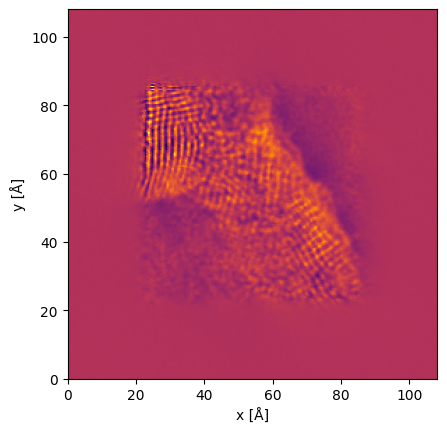

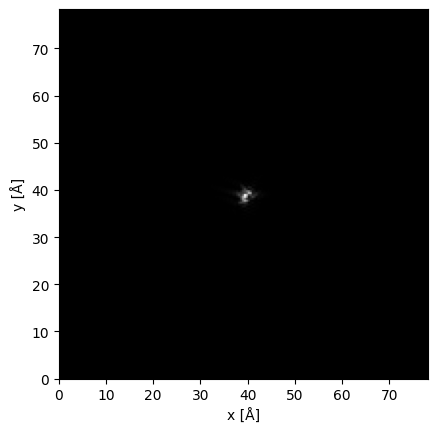

In [601]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
t=-1
ex=mxrpie_objects[0].calibrations[0].sampling*mxrpie_objects[0].array.shape[0]
extent=(0,ex,0,ex)
plt.figure()
plt.imshow(mxrpie_objects[t].angle().array[::-1,::-1],cmap="inferno",extent=extent)#,origin="lower")
plt.xlabel("x [Å]");plt.ylabel("y [Å]")
#plt.clim(-0.5,0.9)
#plt.clim(-0.3,0.2)
#plt.axis("off")
plt.savefig(fig_folder/"10_reconstructied_phase.pdf")
ex=mxrpie_probes[0][0].calibrations[0].sampling*mxrpie_probes[0][0].array.shape[0]
extent=(0,ex,0,ex)
plt.figure()
plt.imshow(mxrpie_probes[t][0].intensity().array,cmap="gray",extent=extent)
plt.xlabel("x [Å]");plt.ylabel("y [Å]")
#plt.axis("off")
plt.savefig(fig_folder/"11_reconstructed_probe.pdf")
#fig.tight_layout()

In [574]:
%pip freeze

abtem @ file:///home/jilek/abtem/abTEM
anyio==4.3.0
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
ase==3.22.1
asttokens==2.4.1
async-lru==2.0.4
attrs==23.2.0
Babel==2.14.0
beautifulsoup4==4.12.3
bleach==6.1.0
certifi==2024.2.2
cffi==1.16.0
charset-normalizer==3.3.2
click==8.1.7
cloudpickle==3.0.0
colorspacious==1.1.2
comm==0.2.2
contourpy==1.2.1
cupy==13.2.0
cycler==0.12.1
dask==2024.4.2
debugpy==1.8.1
decorator==5.1.1
defusedxml==0.7.1
dill==0.3.8
distributed==2024.4.2
emdfile==0.0.14
exceptiongroup==1.2.1
executing==2.0.1
fastjsonschema==2.19.1
fastrlock==0.8.2
filelock==3.13.4
flexcache==0.3
flexparser==0.3.1
fonttools==4.51.0
fqdn==1.5.1
fsspec==2024.3.1
gdown==5.1.0
h11==0.14.0
h5py==3.11.0
hdf5plugin==4.4.0
httpcore==1.0.5
httpx==0.27.0
hyperspy==2.1.1
hyperspy-swift-library @ file:///home/jilek/projects/vienna/hyperspy_swift_library
idna==3.7
imageio==2.34.1
importlib_metadata==7.1.0
ipykernel==6.29.4
ipympl==0.9.4
ipython==8.23.0
ipython-genutils=

Best fit rotation forced to 0 degrees.
Transpose of intensities forced to False.
Normalizing amplitudes: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4096/4096 [00:02<00:00, 1653.74probe position/s]
Performing 1 iterations using a complex object type, with the gradient-descent algorithm, with normalization_min: 1 and step _size: 0.3, in batches of max 32 measurements.
Reconstructing object and probe: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.20s/ iter]


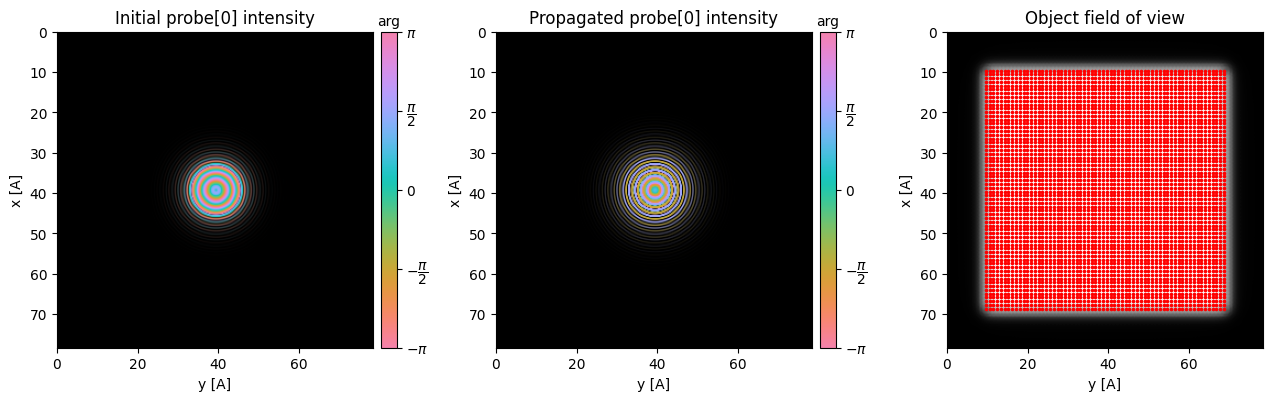

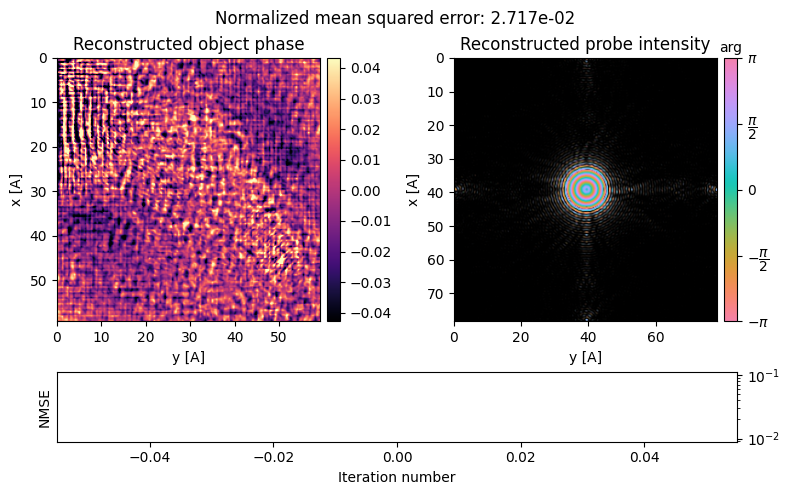

In [575]:
import py4DSTEM 
mee=measurement.array.reshape(N_dp,N_dp,*measurement.shape[-2:]).transpose((0,1,2,3))
ca=py4DSTEM.data.calibration.Calibration()
ca["Q_pixel_size"]=np.squeeze(measurement.calibrations[1].sampling)
ca["R_pixel_size"]=np.linalg.norm(positions[1]-positions[0])
ca["Q_pixel_units"]="mrad"
ca["R_pixel_units"]="A"

dataset = py4DSTEM.DataCube(
    data=mee,
    calibration=ca
)
num_slices=4

#ptycho = py4DSTEM.process.phase.SingleslicePtychographicReconstruction(
ptycho = py4DSTEM.process.phase.MixedstateMultislicePtychography(
#ptycho = py4DSTEM.process.phase.MixedstatePtychographicReconstruction(
    datacube=dataset.copy(),
    verbose=True,
    #initial_scan_positions=positions,
    energy=energy,
    num_slices=num_slices,
    slice_thicknesses=25,
    num_probes=1,
    semiangle_cutoff=semiangle_cutoff,
    defocus=defocus,
    C12=0,
    #C30=aberrations["C30"],
    device='gpu',
    object_padding_px=(30,30),
).preprocess(
    plot_center_of_mass = False,
    padded_diffraction_intensities_shape = (np.array(measurement.shape[-2:])*1.5).astype(int),
    plot_rotation=False,
    force_com_rotation=0,
    force_com_transpose=False,
)

ptycho = ptycho.reconstruct(
    reset=True,
    store_iterations=True,
    num_iter = 1,#8,
    tv_denoise=False,
    butterworth_filter=True,
    gaussian_filter=True,
    fix_potential_baseline=True,    
    
    #normalization_min=1,
    #gaussian_filter_sigma=None,
    step_size=0.3, 
    #step_size_probe=1,
    max_batch_size=32
).visualize(
    iterations_grid = 'auto',
    #plot_fourier_probe=True,
    plot_probe=True
)

In [576]:
#plt.figure(figsize=(10,10))
#rec_sum=np.zeros_like(np.angle(ptycho.object_iterations[-1][0]).T)
#for i in range(slices):
#    asdf=np.angle(ptycho.object_iterations[-1][i]).T
#    rec_sum+=asdf
#    print(np.ptp(asdf))
#
#plt.imshow(rec_sum, origin='lower', cmap='inferno')
##plt.figure(figsize=(10,10))
##plt.savefig("")
#print(np.ptp(rec_sum))
#
#fig,axes=plt.subplots(slices,1,figsize=(10,40))
#for i in range(slices):
#    print(i)
#    im=axes[i].imshow(np.angle(ptycho.object_iterations[-1][i]).T,origin="lower",cmap="inferno")
#    axes[i].axis("off")
#    plt.colorbar(im,ax=axes[i])
#    im.set_clim(vmin=-np.pi/16,vmax=+np.pi/16)
#    #plt.savefig("".format(i))



(-0.5, 287.5, -0.5, 287.5)

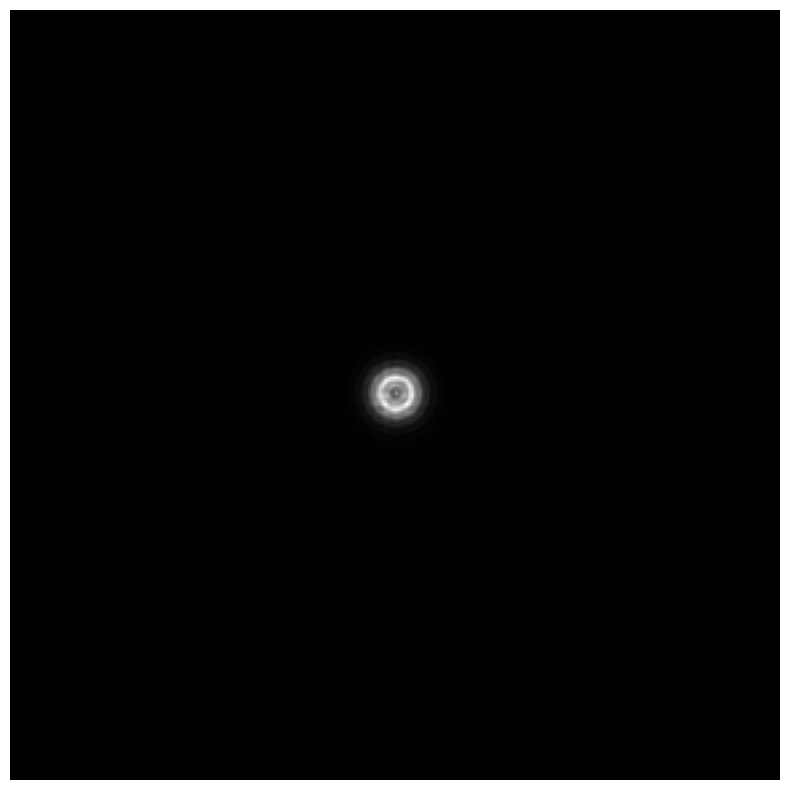

In [577]:
plt.figure(figsize=(10,10)) 
plt.imshow((np.abs(ptycho.probe_iterations[-1][0])**2).T,cmap="gray",origin='lower')
plt.axis("off")

In [578]:
dp.shape

(4096, 192, 192)

(<Axes: title={'center': 'Slice (0,) of (4096, 192, 192) measurement'}, xlabel='$\\alpha_x$ [mrad]', ylabel='$\\alpha_y$ [mrad]'>,
 <matplotlib.image.AxesImage at 0x7f04b9978730>)

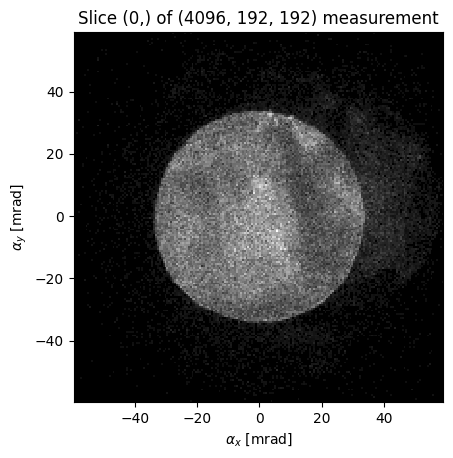

In [579]:
measurement.show()

In [580]:


# Position the detector


# set the geometry by hand
center = np.array(dp.shape[-2:])/2
radius = 5


# overlay selected detector position over mean dp
dataset.position_detector(
    mode = 'circle',
    geometry = (
        center,
        radius
    ),returnfig=True) #hmm to ze chybi return hodnota by mozna stalo za to reportnout... 

#fig.show()
fig=plt.gcf()
ax=plt.gca()
ax.axis("off")
fig.savefig(fig_folder/"03_bf_detector.pdf")


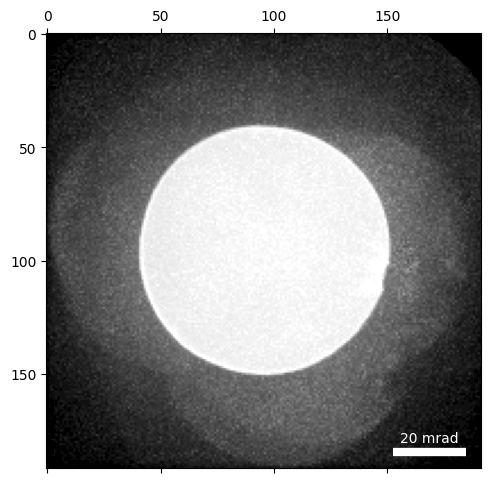

In [581]:
dp_max = dataset.get_dp_max()

py4DSTEM.show(dp_max,power=0.2)

In [582]:
# Capture the virtual BF


# compute
dataset.get_virtual_image(
    mode = 'circle',
    geometry = (center,radius),
    name = 'bright_field',       # the output will be stored in `datacube`'s tree with this name
)

#py4DSTEM.show( dataset.tree('bright_field') , cmap="inferno")
im=dataset.tree('bright_field').data
ex=scan_step_size*im.shape[0]
extent=(0,ex,0,ex)
plt.imshow(im,extent=extent,cmap="inferno")
plt.xlabel("x [Å]");plt.ylabel("y [Å]")
plt.savefig(fig_folder/"04_bf_radius{}px.pdf".format(radius))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4096/4096 [00:00<00:00, 18356.21it/s]


In [583]:
1/(30e-3*1/probe_guess.wavelength)

1.6220201596800996

In [584]:
dpc = py4DSTEM.process.phase.DPC(
    datacube=dataset,
    energy=energy,
    verbose=True,
).preprocess()

Best fit rotation = -1 degrees.


In [585]:
py4DSTEM.show(
    np.linalg.norm([dpc._com_x,dpc._com_y],axis=0),
    cmap='inferno',
    vmin=0.0,
    vmax=0.999,
    ticks=False,
    scalebar=True,
)

In [586]:
plt.imshow(np.linalg.norm([dpc._com_x,dpc._com_y],axis=0),extent=extent,cmap="inferno")
plt.xlabel("x [Å]");plt.ylabel("y [Å]")
plt.savefig(fig_folder/"05_COM_mag.pdf")

Reconstructing phase:  20%|█████████████████████████████████████████████████▌                                                                                                                                                                                                            | 25/128 [00:00<00:00, 1726.08 iter/s]
Step-size has decreased below stopping criterion 1e-06.


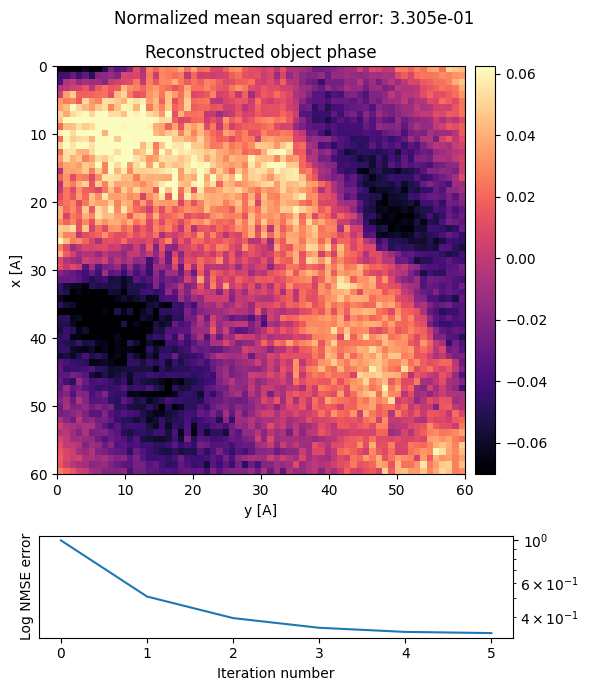

In [587]:
rec=dpc.reconstruct(
    max_iter=32*4,
    reset=True,
    gaussian_filter_sigma = 0.000,#0.375, # in pixels since we haven't calibrated
)
rec.visualize(
    figsize=(6,7),
    cbar=True,
);

In [588]:
plt.figure()
plt.imshow(rec.object_phase,extent=extent,cmap="inferno")
plt.xlabel("x [Å]");plt.ylabel("y [Å]")
plt.savefig(fig_folder/"05_iCOM.pdf")

In [589]:
#Parallax

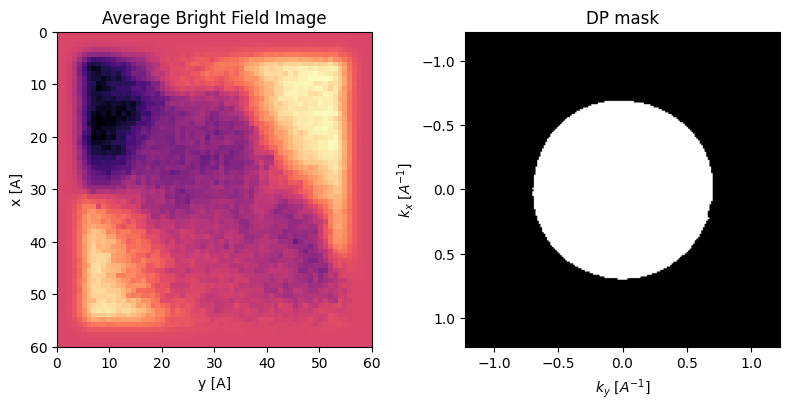

In [590]:
padding_px=16
parallax = py4DSTEM.process.phase.Parallax(
    datacube=dataset,
    energy = energy,
    object_padding_px=(padding_px,padding_px),
    device = "gpu",
    verbose=True,
).preprocess(
    normalize_images=False,
    plot_average_bf=True,
    edge_blend=8,
    threshold_intensity=0.4,
)
fig=plt.gcf()
fig.savefig(fig_folder/"06_parallax_average_brightfield.pdf")


Alignment at bin 2: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2401/2401 [00:16<00:00, 146.46 image subsets/s]


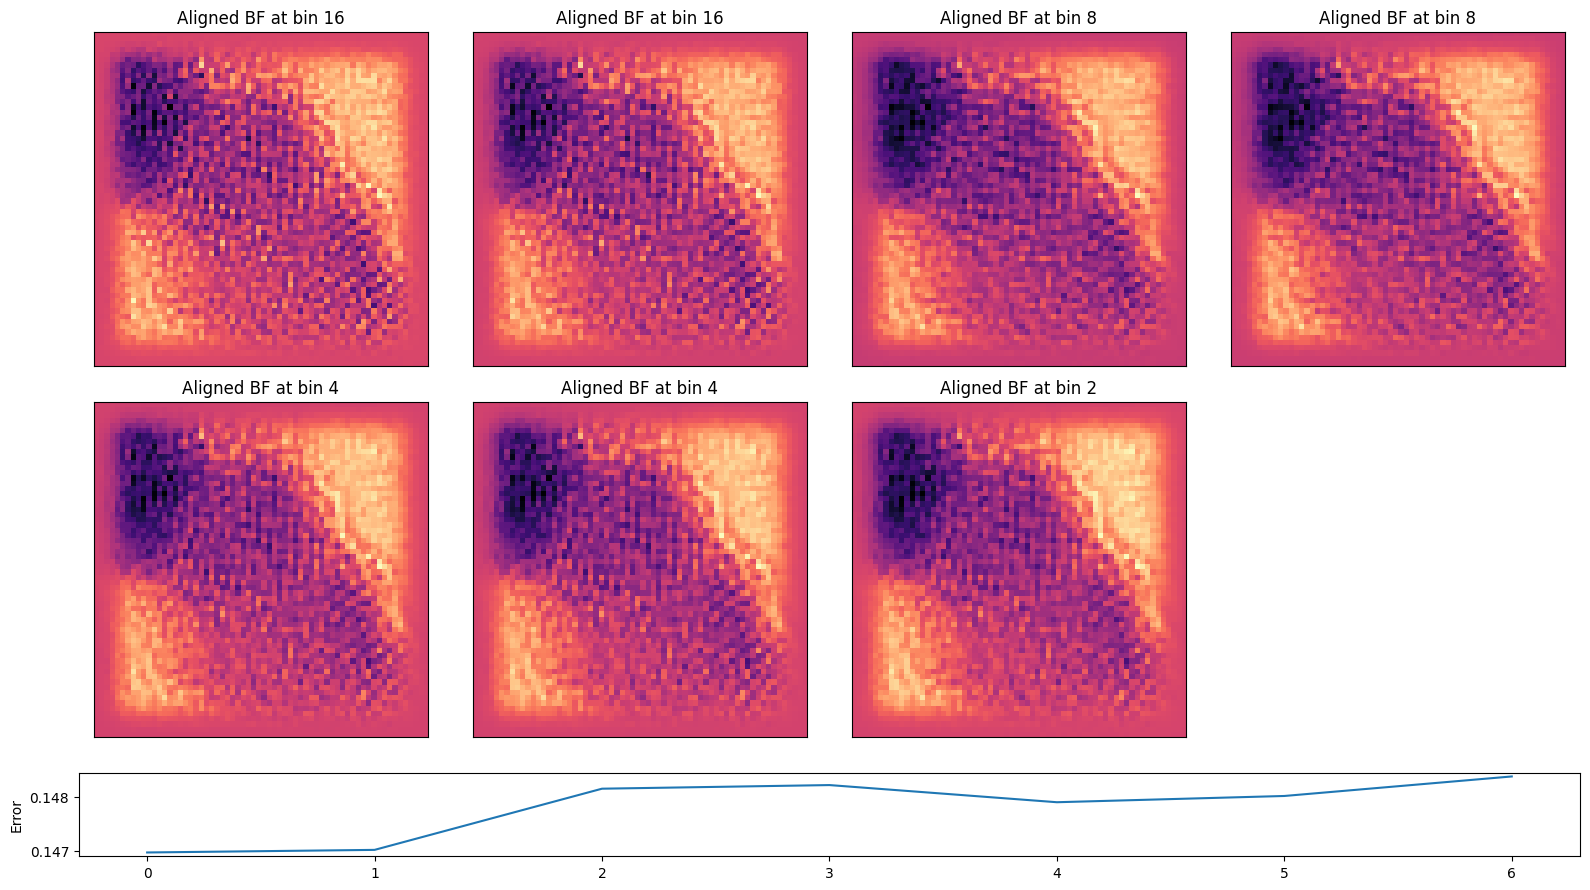

In [591]:
parallax = parallax.reconstruct(
    reset=True,
    regularizer_matrix_size=(4,4),
    regularize_shifts=True,
    running_average=True,
    alignment_bin_values = [16,16,8,8,4,4,2]#[32,32,16,16,8,8,8,8]
)

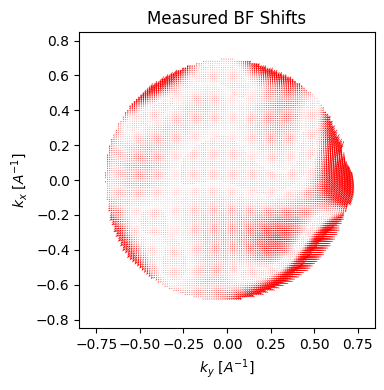

In [592]:
parallax.show_shifts(scale_arrows=0.4)
fig=plt.gcf()
fig.savefig(fig_folder/"07_parallax_measured_shifts.pdf")

In [593]:
kde_upsample_factor=2
parallax.subpixel_alignment(
    kde_upsample_factor=kde_upsample_factor,
    kde_sigma_px=0.,
    plot_upsampled_BF_comparison=True,
    plot_upsampled_FFT_comparison=True,
)
fig=plt.gcf()
fig.savefig(fig_folder/"08_parallax_aligned.pdf")

In [594]:
parallax.aberration_fit(
    #fit_CTF_FFT=True,
    fit_BF_shifts=True,
    plot_CTF_comparison=True,
    #fit_aberrations_max_radial_order=4,
    #fit_aberrations_max_angular_order=1,
    #fit_aberrations_mn=np.array([[3,0,0],[1,0,0]]),
)

Initial Aberration coefficients
-------------------------------
Rotation of Q w.r.t. R = 57.460 deg
Astigmatism (A1x,A1y)  = (-8,-5) Ang
Aberration C1          =  22 Ang
Defocus dF             = -22 Ang
Transpose              = False

Refined Aberration coefficients
-------------------------------
aberration    radial   angular   dir.   coefs
name          order    order             Ang 
----------   -------   -------   ----   -----
C1              2        0         -      22
stig            2        2         x      -8
stig            2        2         y      -5
coma            3        1         x      -1261
coma            3        1         y      -440
trefoil         3        3         x      397
trefoil         3        3         y      -20


Parallax( A Node called 'parallax_reconstruction', containing the following top-level objects in its tree:

)

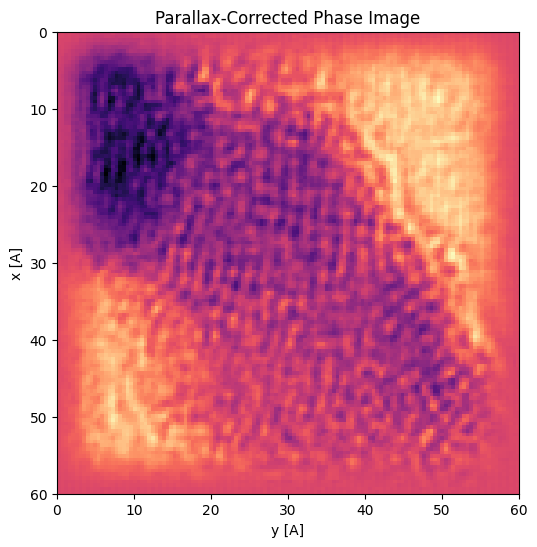

In [595]:
parallax.aberration_correct()
fig=plt.gcf()
fig.savefig(fig_folder/"09_parallax_result.pdf")